In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
set_config(transform_output="pandas")

In [3]:
df = pd.read_csv("dataset/Hs.csv")
df.head()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,Summer,14.045279,1.783347,0.023272,West
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,Summer,13.727790,1.099197,0.022787,West
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,Summer,14.120766,1.770185,0.025072,West
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,Fall,14.558437,0.382081,0.022834,West
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,Summer,13.679845,1.997422,0.016984,East


In [4]:
print(df.shape)
print(df.duplicated().sum())
df = df[~df.duplicated()] # Alternative for df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(68754, 13)
3
(68751, 13)
0


In [5]:
df.describe(include="all")

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
count,6.875100e+04,6.875100e+04,68751.000000,68751.000000,6.875100e+04,68751.000000,68735.000000,525.000000,68743,68743.000000,68735.000000,68743.000000,68743
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,West
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59592,NaN,NaN,NaN,38675
mean,5.257000e+01,2.738000e+01,0.435445,220.527512,3.560570e+01,1.703416,-1.251427,3.023829,NaN,13.797804,3.888802,0.120929,NaN
std,5.800203e-11,4.711288e-11,0.340019,150.757560,9.237123e-14,2.882313,2.820073,2.381294,NaN,0.500145,2.370398,0.051876,NaN
min,5.257000e+01,2.738000e+01,0.034440,0.000000,3.560570e+01,-9.087300,-11.874300,0.000000,NaN,11.564120,0.035977,0.015402,NaN
25%,5.257000e+01,2.738000e+01,0.174945,63.439000,3.560570e+01,-0.261600,-3.090000,1.320000,NaN,13.458812,2.098357,0.083184,NaN
50%,5.257000e+01,2.738000e+01,0.318160,340.226000,3.560570e+01,1.611500,-1.274900,2.450000,NaN,13.799956,3.235125,0.114808,NaN
75%,5.257000e+01,2.738000e+01,0.608910,353.500500,3.560570e+01,3.600400,0.662450,3.970000,NaN,14.136762,5.286641,0.150876,NaN


In [6]:
eda_df = df.copy(deep=True)

['Xp', 'Yp', 'Hsig', 'Dir', 'Depth', 'X-Windv', 'Y-Windv', 'U10', 'Temperature', 'Wind_Speed', 'Wave_Steepness']


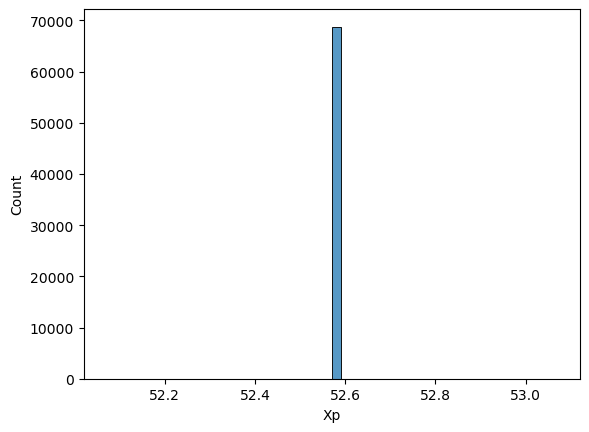

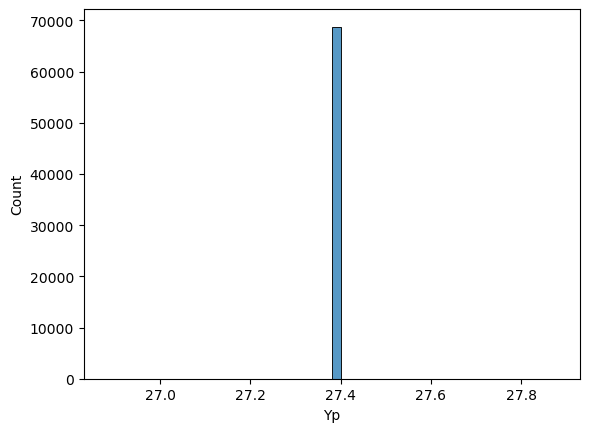

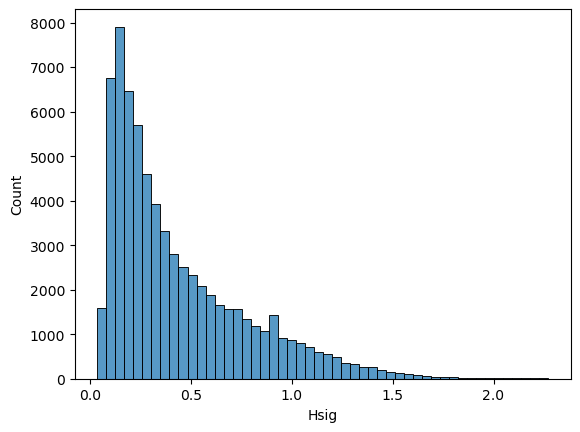

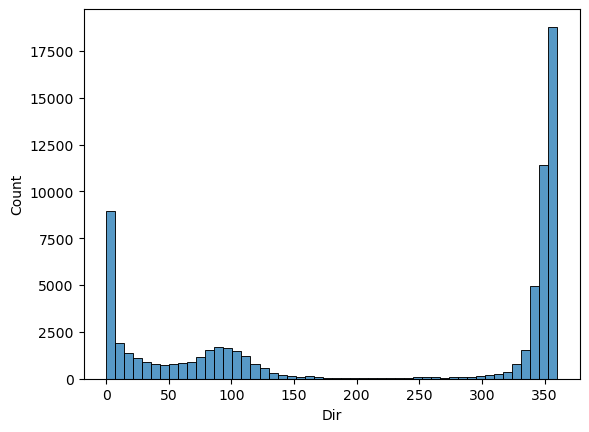

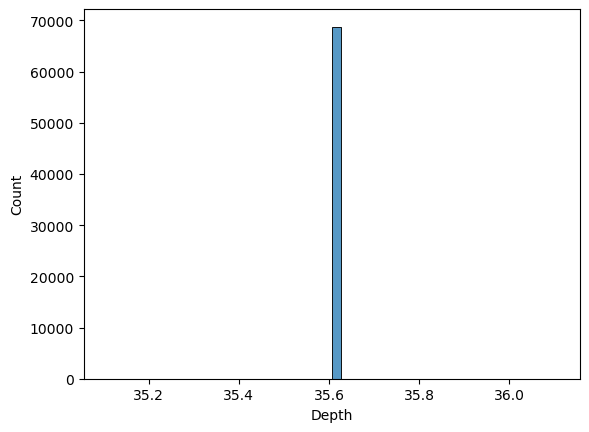

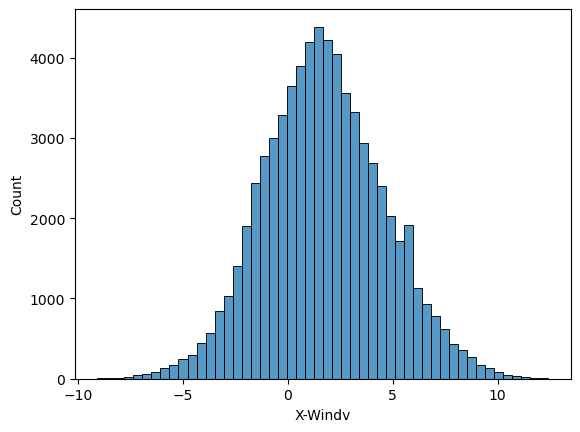

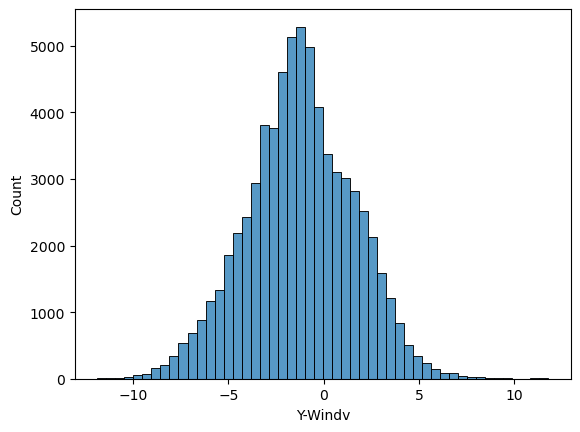

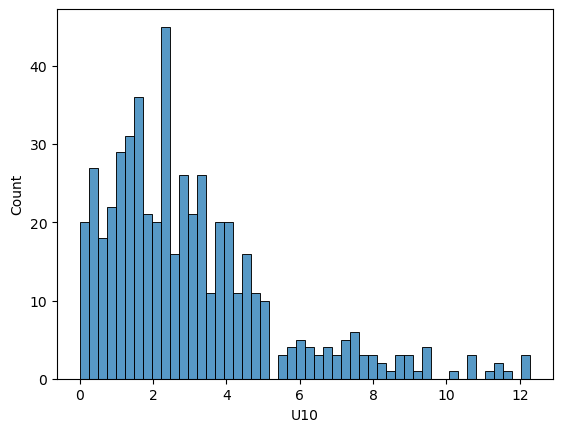

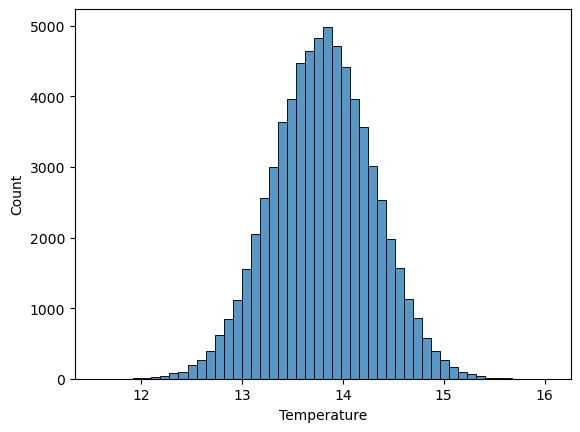

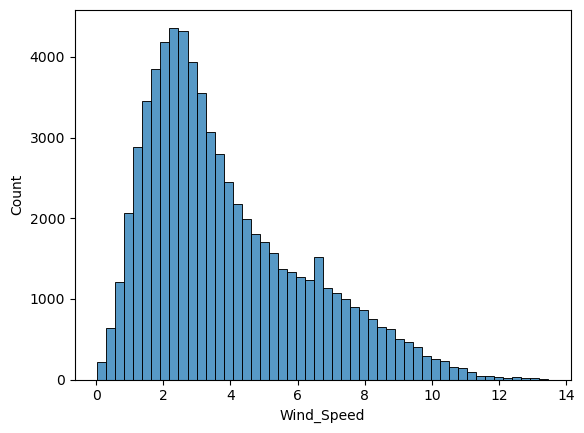

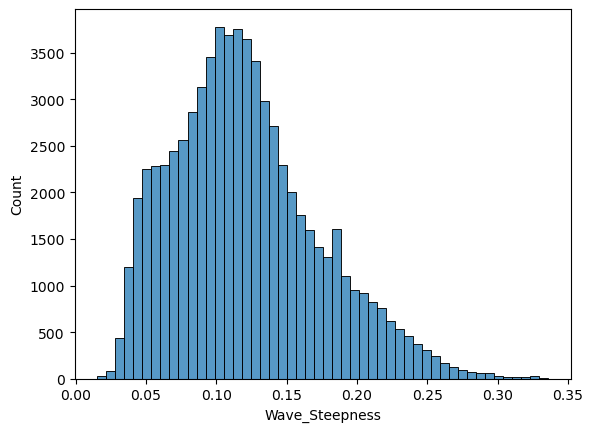

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

for col in numerical_columns:
    sns.histplot(data=eda_df, x = col, bins = 50)
    plt.show()

In [8]:
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
cat_encoded = onehot_encoder.fit_transform(eda_df[["Season", "Wind_Dir_Category"]])
eda_df = pd.concat([eda_df, cat_encoded], axis=1).drop(columns=["Season", "Wind_Dir_Category"])
eda_df.head()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Temperature,Wind_Speed,Wave_Steepness,Season_Fall,Season_Spring,Season_Summer,Season_nan,Wind_Dir_Category_East,Wind_Dir_Category_North,Wind_Dir_Category_South,Wind_Dir_Category_West,Wind_Dir_Category_nan
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,14.045279,1.783347,0.023272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,13.727790,1.099197,0.022787,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,14.120766,1.770185,0.025072,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,14.558437,0.382081,0.022834,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,13.679845,1.997422,0.016984,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


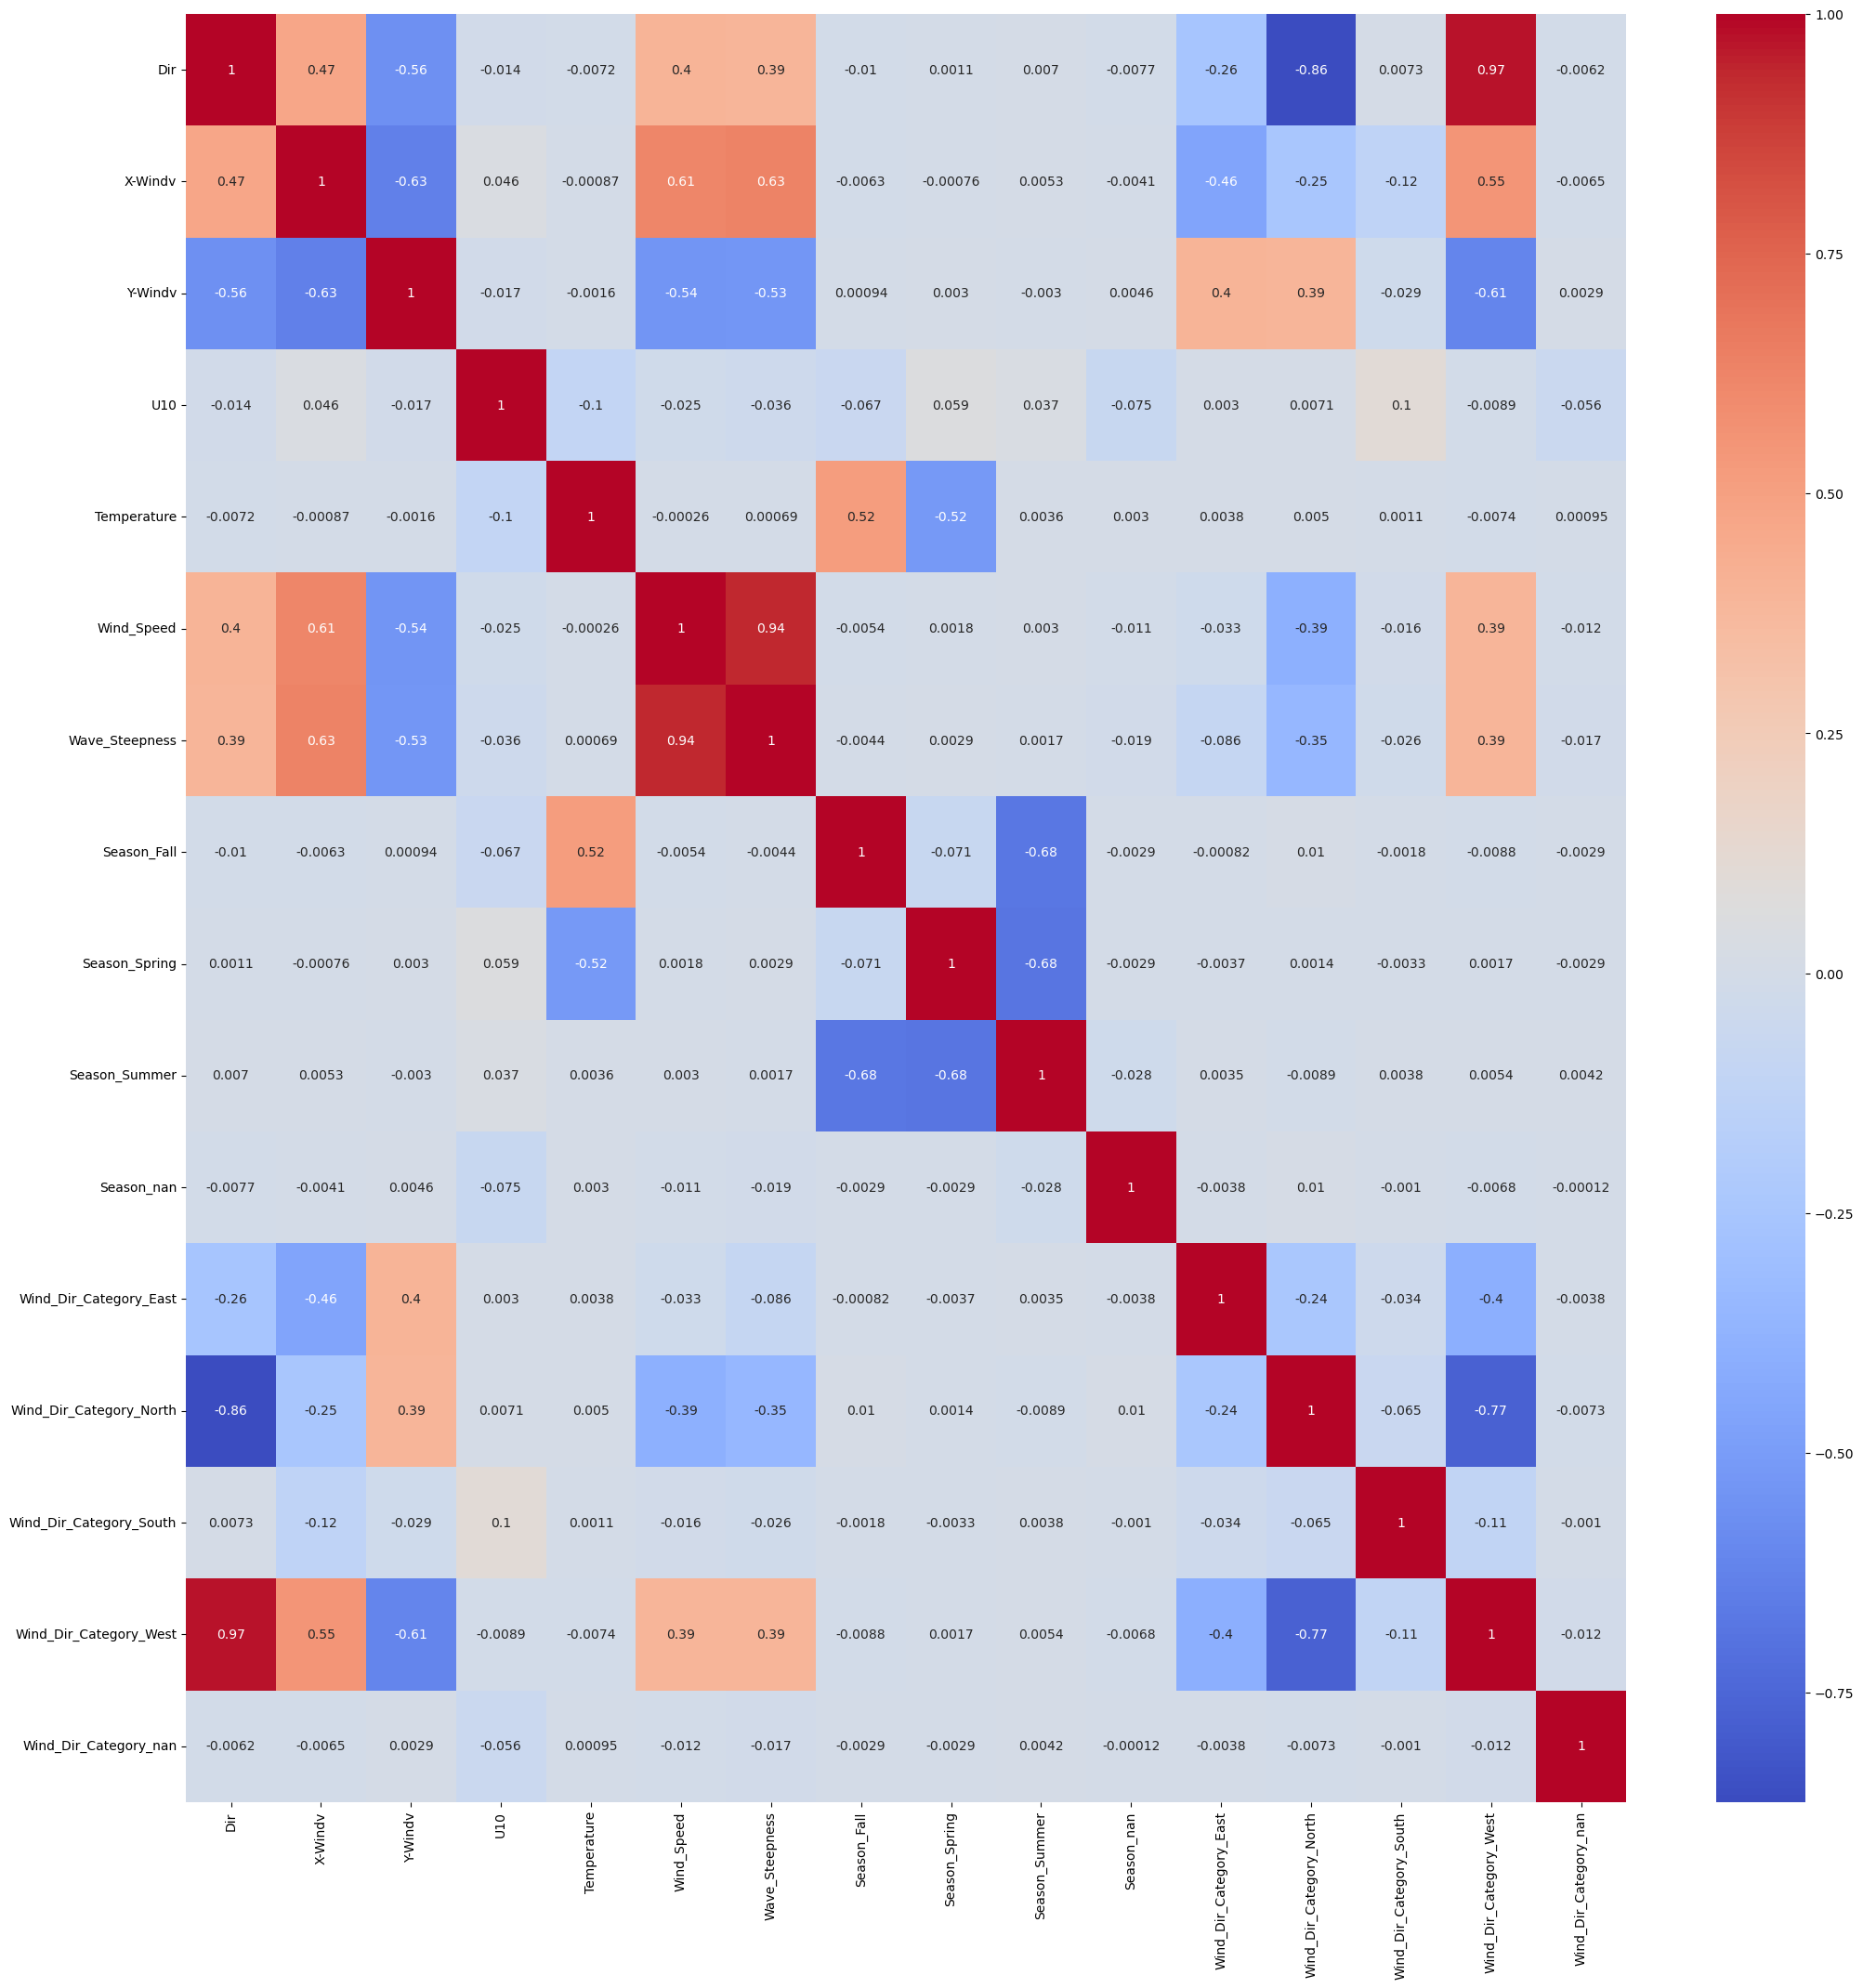

In [9]:
corr_matrix = eda_df.drop(columns=["Xp", "Yp", "Depth", "Hsig"]).corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Hsig"])
y = df["Hsig"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()


,Xp,Yp,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
67190,52.57,27.38,348.801,35.6057,4.9390,-6.3596,NaN,Summer,14.466337,8.052219,0.224831,West
53616,52.57,27.38,358.303,35.6057,-0.8858,-2.5059,NaN,Summer,14.245134,2.657852,0.124806,West
42844,52.57,27.38,351.653,35.6057,4.2810,-2.1436,NaN,Summer,14.020267,4.787691,0.133315,West
41054,52.57,27.38,344.927,35.6057,5.5828,-1.2542,NaN,Summer,14.057357,5.721947,0.152197,West
65293,52.57,27.38,350.382,35.6057,5.1028,-5.4646,NaN,Summer,13.167133,7.476658,0.203409,West


In [11]:
#preprocessing pipelines
drop_features = ['Xp', 'Yp', 'Depth', 'Wind_Speed', "U10"]
numeric_features = [ 'Dir', 'Y-Windv', 'Temperature',  'Wave_Steepness', 'X-Windv']
categorical_features = ["Season", "Wind_Dir_Category"]

# Num pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Cat pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Full preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("drop_features", "drop", drop_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
linear_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("regressor", LinearRegression())
    ]
)

linear_pipeline.fit(X_train, y_train)
y_pred = linear_pipeline.predict(X_test)

#Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

#Calculating the R2 score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error Linear: {mse}')
print(f'R2 Score Linear: {r2}')

cross_val_score(linear_pipeline, X_train, y_train, cv=5, scoring="r2").mean()

Mean Squared Error Linear: 0.017612534510063275
R2 Score Linear: 0.8468956250435367


0.8439379187553868

In [13]:
param_grid_lr = {
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"]
}

random_search_lr = RandomizedSearchCV(
    estimator=linear_pipeline,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring="r2" 
)

random_search_lr.fit(X_train, y_train)
print("Best parameters found: ", random_search_lr.best_params_)
print("Best score (R2): ", random_search_lr.best_score_)

C:\Users\emmanuel.osademe\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'preprocessing__num__imputer__strategy': 'median', 'preprocessing__cat__imputer__strategy': 'most_frequent'}
Best score (R2):  0.8439735556754158


In [14]:
linear_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

param_grid_ridge = {
    # Imputation
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"],
    "preprocessing__cat__imputer__fill_value": ["missing", "unknown", "none"],
    
    # Regularization strength
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],

    # Solver
    "regressor__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "saga"]
}

random_search_ridge = RandomizedSearchCV(
    estimator=linear_pipeline,
    param_distributions=param_grid_ridge,
    n_iter=50,
    cv=5,
    scoring="r2",
    random_state=42
)

random_search_ridge.fit(X_train, y_train)
print("Best parameters found: ", random_search_ridge.best_params_)
print("Best score (R2): ", random_search_ridge.best_score_)

Best parameters found:  {'regressor__solver': 'cholesky', 'regressor__alpha': 0.01, 'preprocessing__num__imputer__strategy': 'median', 'preprocessing__cat__imputer__strategy': 'most_frequent', 'preprocessing__cat__imputer__fill_value': 'unknown'}
Best score (R2):  0.8439735566376994


In [15]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

param_grid_lasso = {
    # Imputation
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"],
    "preprocessing__cat__imputer__fill_value": ["missing", "unknown", "none"],

    # Regularization strength
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

random_search_lasso = RandomizedSearchCV(
    estimator=lasso_pipeline,
    param_distributions=param_grid_lasso,
    n_iter=50,
    cv=5,
    scoring="r2",
    random_state=42
)

# Fit the search
random_search_lasso.fit(X_train, y_train)

# Output best results
print("Best parameters found: ", random_search_lasso.best_params_)
print("Best score (R2): ", random_search_lasso.best_score_)

Best parameters found:  {'regressor__alpha': 0.001, 'preprocessing__num__imputer__strategy': 'median', 'preprocessing__cat__imputer__strategy': 'most_frequent', 'preprocessing__cat__imputer__fill_value': 'unknown'}
Best score (R2):  0.8424296843085353


In [16]:
elasticnet_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))  
])

param_grid_elasticnet = {
    # Imputation strategies
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"],
    "preprocessing__cat__imputer__fill_value": ["missing", "unknown", "none"],

    # Regularization strength (alpha)
    "regressor__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],

    # Mixing between Lasso and Ridge (l1_ratio)
    "regressor__l1_ratio": [0.1, 0.2, 0.5, 0.7, 1],
}

random_search_elasticnet = RandomizedSearchCV(
    estimator=elasticnet_pipeline,
    param_distributions=param_grid_elasticnet,
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Negative MSE (because lower is better)
    random_state=42
)

# Fit the random search
random_search_elasticnet.fit(X_train, y_train)

# Output the best results
print("Best parameters found: ", random_search_elasticnet.best_params_)
print("Best score (R2): ", random_search_elasticnet.best_score_)

Best parameters found:  {'regressor__l1_ratio': 0.1, 'regressor__alpha': 0.001, 'preprocessing__num__imputer__strategy': 'median', 'preprocessing__cat__imputer__strategy': 'most_frequent', 'preprocessing__cat__imputer__fill_value': 'unknown'}
Best score (R2):  0.8439131146262866


In [17]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor())
])

param_grid_xgb = {
    # Imputation strategies
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"],
    "preprocessing__cat__imputer__fill_value": ["missing", "unknown", "none"],

    # XGBoost Hyperparameters
    "regressor__n_estimators": [50, 100, 200, 300],  # Number of boosting rounds
    "regressor__learning_rate": [0.001, 0.01, 0.1, 0.2],  # Step size at each iteration
    "regressor__max_depth": [3, 4, 5, 6],  # Maximum depth of a tree
    "regressor__min_child_weight": [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) in a child
    "regressor__subsample": [0.6, 0.7, 0.8, 1.0],  # Fraction of samples to use for each tree
    "regressor__colsample_bytree": [0.6, 0.7, 0.8, 1.0],  # Fraction of features to use per tree
    "regressor__gamma": [0, 0.1, 0.2, 0.3],  # Regularization term to control complexity
    "regressor__scale_pos_weight": [1, 10, 50],  # Balance of positive and negative weights
    "regressor__booster": ['gbtree', 'gblinear', 'dart']  # Type of boosting model
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_grid_xgb,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Use R-squared as the evaluation metric
    random_state=42,
    n_jobs=-1  # Use all available cores for faster computation
)

# Fit the random search
random_search_xgb.fit(X_train, y_train)

# Output the best results
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best score (R2): ", random_search_xgb.best_score_)

Best parameters found:  {'regressor__subsample': 0.7, 'regressor__scale_pos_weight': 50, 'regressor__n_estimators': 50, 'regressor__min_child_weight': 3, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0, 'regressor__colsample_bytree': 1.0, 'regressor__booster': 'dart', 'preprocessing__num__imputer__strategy': 'mean', 'preprocessing__cat__imputer__strategy': 'most_frequent', 'preprocessing__cat__imputer__fill_value': 'missing'}
Best score (R2):  0.9598885154377135


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    # Imputation strategies
    "preprocessing__num__imputer__strategy": ["mean", "median"],
    "preprocessing__cat__imputer__strategy": ["most_frequent", "constant"],
    "preprocessing__cat__imputer__fill_value": ["missing", "unknown", "none"],

    # RandomForest Hyperparameters
    "regressor__n_estimators": [50, 100, 200, 300],  # Number of trees in the forest
    "regressor__max_depth": [None, 10, 20, 30],  # Max depth of each tree
    "regressor__min_samples_split": [2, 5, 10],  # Minimum number of samples to split an internal node
    "regressor__min_samples_leaf": [1, 2, 4],  # Minimum number of samples to be at a leaf node
    "regressor__max_features": ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    "regressor__bootstrap": [True, False],  # Whether bootstrap samples are used when building trees
    "regressor__oob_score": [True, False],  # Whether to use out-of-bag samples to estimate generalization error
    "regressor__n_jobs": [-1],  # Use all available cores for faster computation
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_grid_rf,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # R-squared as the evaluation metric
    random_state=42,
    n_jobs=-1  # Use all available cores for faster computation
)

# Fit the random search
random_search_rf.fit(X_train, y_train)

# Output the best results
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score (R2): ", random_search_rf.best_score_)

C:\Users\emmanuel.osademe\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\emmanuel.osademe\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\emmanuel.osademe\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\emmanuel.osademe\AppData\

Best parameters found:  {'regressor__oob_score': False, 'regressor__n_jobs': -1, 'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': None, 'regressor__bootstrap': False, 'preprocessing__num__imputer__strategy': 'median', 'preprocessing__cat__imputer__strategy': 'most_frequent', 'preprocessing__cat__imputer__fill_value': 'missing'}
Best score (R2):  0.9605301144137609
